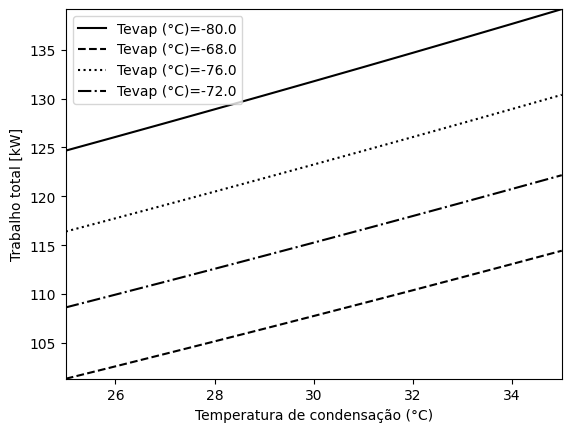

In [2]:
from CoolProp.CoolProp import PropsSI as COOLPROP
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Listas
T1_lista = []
T13_lista = []
Wcomp_total_lista = []
COP_lista = []
cont = []

#temperatura de condensação
for i in range (25, 36, 1):
    cont.append(i+273.15)

#Parâmetros
Pfrig = 120 * 1000
T5 = -24 + 273.15 #[K]
T16 = -29 + 273.15 #[K] 
fluid_high = 'R600'
fluid_low = 'R170'
N = 0.7
drop_suc = 0 #[Pa]
drop_desc = 0 #[Pa]
DeltaT = 0.01 #[°C]

#Pressão crítica do fluido do ciclo de alta pressão
P_crit_high = COOLPROP('PCRIT', fluid_high)

#Ciclo de baixa pressão
P5 = COOLPROP('P', 'T', T5, 'Q', 0, fluid_low)
h5 = COOLPROP('H', 'T', T5, 'Q', 0, fluid_low)
h6 = h5
P4 = P5

#Ciclo de alta pressão
P16 = COOLPROP('P', 'T', T16, 'Q', 0.3, fluid_high)
P9 = P16
T9 = COOLPROP('T', 'P', P9, 'Q', 1, fluid_high)
h9 = COOLPROP('H', 'T', T9, 'Q', 1, fluid_high)
#CBP_sup
hm = h9
Pm = P9 - drop_suc
Tm = COOLPROP('T', 'H', hm, 'P', Pm, fluid_high)
Pn = Pm
Tn = Tm + DeltaT
hn = COOLPROP('H', 'P', Pn, 'T', Tn, fluid_high)
sn = COOLPROP('S', 'P', Pn, 'T', Tn, fluid_high)

#Loop nos dois ciclos - variação das temperaturas de evaporação e condensação
for T1 in range (-80, -67, 4):
    #Ciclo inferior
    T1 = T1 + 273.15
    P1 = COOLPROP('P', 'T', T1, 'Q', 1, fluid_low)
    h1 = COOLPROP('H', 'T', T1, 'Q', 1, fluid_low)
    #Pressão intermediária
    P_int_inf =  (P1 * P5) ** 0.5
    P6 = P_int_inf
    P3 = P_int_inf
    P7 = P_int_inf
    P2 = P_int_inf
    r1 = P2/P1
    r2 = P4/P3
    h7 = COOLPROP('H', 'P', P7, 'Q', 0, fluid_low)
    h8 = h7
    h3 = COOLPROP('H', 'P', P3, 'Q', 1, fluid_low)
    #CBP_inf
    ha = h1
    Pa = P1 - drop_suc
    Ta = COOLPROP('T', 'H', ha, 'P', Pa, fluid_low)
    Pb = Pa
    Tb = Ta + DeltaT
    hb = COOLPROP('H', 'T', Tb, 'P', Pb, fluid_low)
    sb = COOLPROP('S', 'T', Tb, 'P', Pb, fluid_low)
    Pc = P2 + drop_desc
    Sc_ideal = sb     
    hc_ideal = COOLPROP('H', 'S', Sc_ideal , 'P', Pc, fluid_low)
    hc_real = (hc_ideal - hb)/N + hb
    h2 = hc_real
    m_CBP_inf = Pfrig / (h1 - h8)
    #Trabalho específico do CBP_inf
    w_CBP_inf = hc_real - hb
    #Trabalho do CBP_inf
    W_CBP_inf = m_CBP_inf * w_CBP_inf
    #CAP_inf
    hw = h3
    Pw = P3 - drop_suc
    Tw = COOLPROP('T', 'H', hw, 'P', Pw, fluid_low)
    Px = Pw
    Tx = Tw + DeltaT
    hx = COOLPROP('H', 'T', Tx, 'P', Px, fluid_low)
    sx = COOLPROP('S', 'T', Tx, 'P', Px, fluid_low)
    Py = P4 + drop_desc
    sy_ideal = sx
    hy_ideal = COOLPROP('H', 'P', Py, 'S', sy_ideal, fluid_low)
    hy_real = (hy_ideal - hx)/N + hx
    h4 = hy_real
    m_CAP_inf = m_CBP_inf * (h7 - h2) / (h6 - h3)
    #Trabalho específico do CAP_inf
    w_CAP_inf = hy_real - hx
    #Trabalho do CAP_inf
    W_CAP_inf = m_CAP_inf * w_CAP_inf
    #Trabalho total no ciclo inferior de baixa pressão
    W_low_total = W_CAP_inf + W_CBP_inf
    #Calor trocado no trocador central
    Qcond_low =  m_CAP_inf * (h4 - h5)
    for T13 in cont:
        #Ciclo de alta pressão
        Qevap_high = Qcond_low
        P13 = COOLPROP('P', 'T', T13, 'Q', 0, fluid_high)
        h13 = COOLPROP('H', 'T', T13, 'Q', 0, fluid_high)
        h14 = h13
        P12 = P13
        P_int_sup = (P9 * P12) ** 0.5
        P10 = P_int_sup
        P11 = P_int_sup
        P14 = P_int_sup
        P15 = P_int_sup
        h15 = COOLPROP('H', 'P', P15, 'Q', 0, fluid_high)
        h16 = h15
        h11 = COOLPROP('H', 'P', P11, 'Q', 1, fluid_high)
        Po = P10 + drop_desc
        so_ideal = sn
        ho_ideal = COOLPROP('H', 'P', Po, 'S', so_ideal, fluid_high)
        ho_real = (ho_ideal - hn)/N + hn
        h10 = ho_real
        #CBP_sup
        m_CBP_sup = Qevap_high / (h9 - h16)
        #Trabalho específico do CBP_sup
        w_CBP_sup = ho_real - hn
        #Trabalho do CBP_sup
        W_CBP_sup = w_CBP_sup * m_CBP_sup
        #CAP_sup
        he = h11
        Pe = P11 - drop_suc
        Te = COOLPROP ('T', 'H', he, 'P', Pe, fluid_high)
        Pf = Pe
        Tf = Te + DeltaT
        hf = COOLPROP('H', 'T', Tf, 'P', Pf, fluid_high)
        sf = COOLPROP('S', 'T', Tf, 'P', Pf, fluid_high)
        Pg = P12 + drop_desc
        sg_ideal = sf
        hg_ideal = COOLPROP('H', 'P', Pg, 'S', sg_ideal, fluid_high)
        hg_real = (hg_ideal - hf)/N + hf
        h12 = hg_real
        m_CAP_sup = m_CBP_sup * (h15 - h10) / (h14 - h11)
        #Verificação da pressão crítica
        if P_crit_high > P12:
            T1_lista.append(T1 - 273.15)
            T13_lista.append(T13 - 273.15)
            #Trabalho específico do CAP
            w_CAP_sup = hg_real - hf
            #Trabalho do CAP_sup
            W_CAP_sup = m_CAP_sup * w_CAP_sup
            #Trabalho total do ciclo de alta pressão
            W_high_total = W_CAP_sup + W_CBP_sup
            #Trabalho total do ciclo
            Wcomp_total = W_low_total + W_high_total
            Wcomp_total_lista.append(Wcomp_total / 1000)
            #COP
            COP = Pfrig / Wcomp_total
            COP_lista.append(COP)
        else:
            print ('A pressão P12 = {:0.2f} kPa (T1 = {:0.2f}°C, T9 = {:0.2f}°C) é maior do que a ' 
               'pressão crítica do {} logo o ponto não foi incluído no gráfico'
                   .format(P12 / 1000,T1-273.15,T13-273.15,fluid_high))


x = T13_lista
z = T1_lista
y = Wcomp_total_lista

# Define um dicionário que mapeia os valores de z para estilos de linha diferentes
z_linestyles = {z_val: linestyle for z_val, linestyle in zip(set(z), ['-','--', ':', '-.'])}

# Cria uma figura com um gráfico 2D
fig, ax = plt.subplots()

# Itera sobre os valores únicos de z
for z_val in set(z):
    # Seleciona os pontos correspondentes a z_val
    x_val = [x[i] for i in range(len(x)) if z[i] == z_val]
    y_val = [y[i] for i in range(len(y)) if z[i] == z_val]

    # Plota os pontos com uma linha ligando eles
    ax.plot(x_val, y_val, linestyle=z_linestyles[z_val], color='black', label=f'Tevap (°C)={z_val}')

# Define os limites dos eixos X e Y
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Define os rótulos dos eixos X e Y
ax.set_xlabel('Temperatura de condensação (°C)')
ax.set_ylabel('Trabalho total [kW]')

# Adiciona a legenda
ax.legend()


# Mostra o gráfico
plt.show()


